# Binary classification quality metrics

Mohamed Amine Ben Salem (mohamedbensalem@mail.ru)

## Detection of fraudulent transactions

### Loading data
Based [Machine Learning for Credit Card Fraud Detection](https://fraud-detection-handbook.github.io/fraud-detection-handbook/Foreword.html)

In [73]:
# install required packages
!pip install graphviz
!pip install xgboost
!pip install imbalanced-learn
!pip install torchvision

In [74]:
# Initialization: Load shared functions and simulated data 
# Load shared functions
if not os.path.exists("shared_functions.py"):
    !curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# Get simulated data from Github repository
if not os.path.exists("simulated-data-transformed"):
    !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-transformed

<Figure size 640x480 with 0 Axes>

In [75]:
DIR_INPUT='./simulated-data-transformed/data/' 

BEGIN_DATE = "2018-05-01"
END_DATE = "2018-08-31"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files
CPU times: user 637 ms, sys: 806 ms, total: 1.44 s
Wall time: 1.51 s
1178220 transactions loaded, containing 10432 fraudulent transactions


In [76]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,288062,2018-05-01 00:01:21,3546,2944,18.71,2592081,30,0,0,0,...,17.0,44.430588,89.0,42.628652,0.0,0.0,12.0,0.0,36.0,0.0
1,288063,2018-05-01 00:01:48,206,3521,18.60,2592108,30,0,0,0,...,26.0,27.461538,104.0,26.104038,6.0,0.0,11.0,0.0,38.0,0.0
2,288064,2018-05-01 00:02:22,2610,4470,66.67,2592142,30,0,0,0,...,26.0,46.767692,110.0,50.019727,1.0,0.0,5.0,0.0,22.0,0.0
3,288065,2018-05-01 00:03:15,4578,1520,79.41,2592195,30,0,0,0,...,17.0,83.097647,69.0,91.713188,0.0,0.0,8.0,0.0,33.0,0.0
4,288066,2018-05-01 00:03:51,1246,7809,52.08,2592231,30,0,0,0,...,35.0,52.931714,130.0,55.928385,0.0,0.0,6.0,0.0,19.0,0.0


In [77]:
from sklearn.model_selection import train_test_split

output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW']

X = transactions_df[input_features]
y = transactions_df[output_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_params = {
    'n_neighbors': 5,
}

knn = KNeighborsClassifier(**knn_params).fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_y_pred)
print(f"Percentage of correct answers for knn: {knn_acc:.4}")

Percentage of correct answers for knn: 0.9932
CPU times: user 1min 3s, sys: 0 ns, total: 1min 3s
Wall time: 1min 3s


## Classifier "dummy"

This classifier simply predicts the most frequent output class (or random class) without regard to input feature values.

This type of classifiers can be considered as simple base estimates for classification metrics. Any proposed algorithm should show the quality better than the "blank"

In [79]:
%%time
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier().fit(X_train, y_train)

dummy_y_pred = dummy.predict(X_test)
dummy_acc = accuracy_score(y_test, dummy_y_pred)
print(f"Percentage of correct answers for dummy: {dummy_acc:.4}")

Percentage of correct answers for dummy: 0.9909
CPU times: user 63.6 ms, sys: 0 ns, total: 63.6 ms
Wall time: 61 ms


### Class imbalance

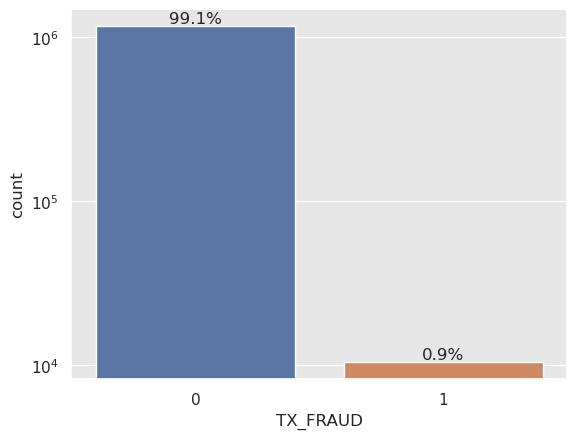

In [80]:
ax = sns.countplot(x=y)
ax.set_yscale('log')
total = len(y)
for p in ax.patches:
    px = p.get_bbox().get_points()[:,0]
    py = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*py/total), (px.mean(), py), 
            ha='center', va='bottom') # set the alignment of the text

### Binary classification error matrix
<img src="https://miro.medium.com/max/332/1*BTB9weIUfSsSRy5kvh_-uA.png" />

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

### Error matrix for "dummy"

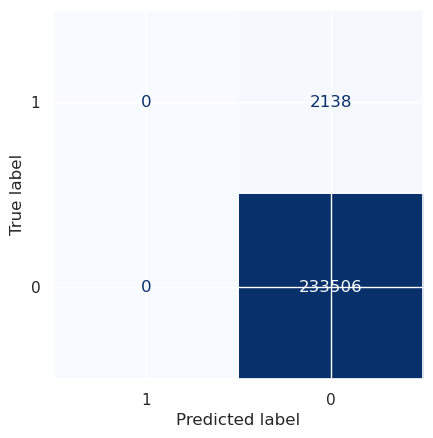

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dummy, X_test, y_test, cmap=plt.cm.Blues, labels=[1, 0], colorbar=False)

plt.show()

### Error matrix for kNN

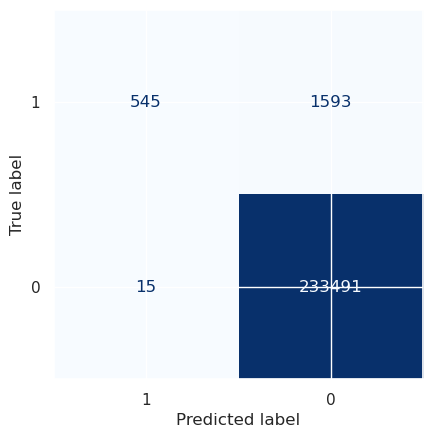

In [82]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap=plt.cm.Blues, labels=[1, 0], colorbar=False)

plt.show()

### Precision and Recall


**Precision** - Proportion of correct answers, among all _predictions_ of the positive class
$$
P = \frac{TP}{TP + FP}
$$

**Recall** - proportion of correct answers among all _true_ examples of the positive class
$$
R = \frac{TP}{TP + FN}
$$

In [83]:
from sklearn.metrics import precision_score, recall_score

dummy_precision = precision_score(y_test, dummy_y_pred)
dummy_recall = recall_score(y_test, dummy_y_pred)

knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)

print(f"Dummy precision = {dummy_precision:.5}")
print(f"Dummy recall = {dummy_recall:.5}")
print("")
print(f"kNN precision = {knn_precision:.4}")
print(f"kNN recall = {knn_recall:.4}")

Dummy precision = 0.0
Dummy recall = 0.0

kNN precision = 0.9732
kNN recall = 0.2549


### Comparison of classifiers

Train logistic regression

In [84]:
%%time
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_test)

CPU times: user 24.7 s, sys: 8.8 s, total: 33.5 s
Wall time: 5.8 s


### Error matrix for Logistic Regression

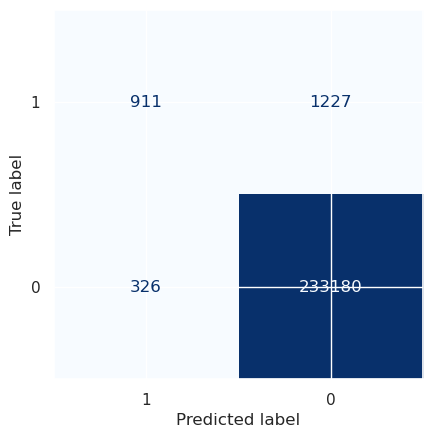

In [85]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap=plt.cm.Blues, labels=[1, 0], colorbar=False)

plt.show()

In [86]:
logreg_precision = precision_score(y_test, logreg_y_pred)
logreg_recall = recall_score(y_test, logreg_y_pred)

In [87]:
print(f"LogReg precision = {logreg_precision:.5}")
print(f"LogReg recall = {logreg_recall:.5}")
print("")
print(f"kNN precision = {knn_precision:.4}")
print(f"kNN recall = {knn_recall:.4}")

LogReg precision = 0.73646
LogReg recall = 0.4261

kNN precision = 0.9732
kNN recall = 0.2549


## F measure

$F_1$ measure - the harmonic mean between precision and recall
$$
F_1 = \frac{2PR}{P+R}.
$$

$F_\beta$ - a generalization of the $F$-measure using the coefficient $\beta$ - the degree of importance of completeness compared to accuracy.
$$
F_\beta = (1+\beta^2)\frac{PR}{\beta^2 P + R} = \frac{(1+\beta^2)TP}{(1+\beta^2)TP + \beta^2 FN + FP}.
$$

In [88]:
from sklearn.metrics import f1_score

knn_f1 = f1_score(y_test, knn_y_pred)
logreg_f1 = f1_score(y_test, logreg_y_pred)

print(f"LogReg F1 = {logreg_f1:.5}")
print(f"kNN F1 = {knn_f1:.5}")

LogReg F1 = 0.53985
kNN F1 = 0.404


## PR (Precison Recall) - Curve

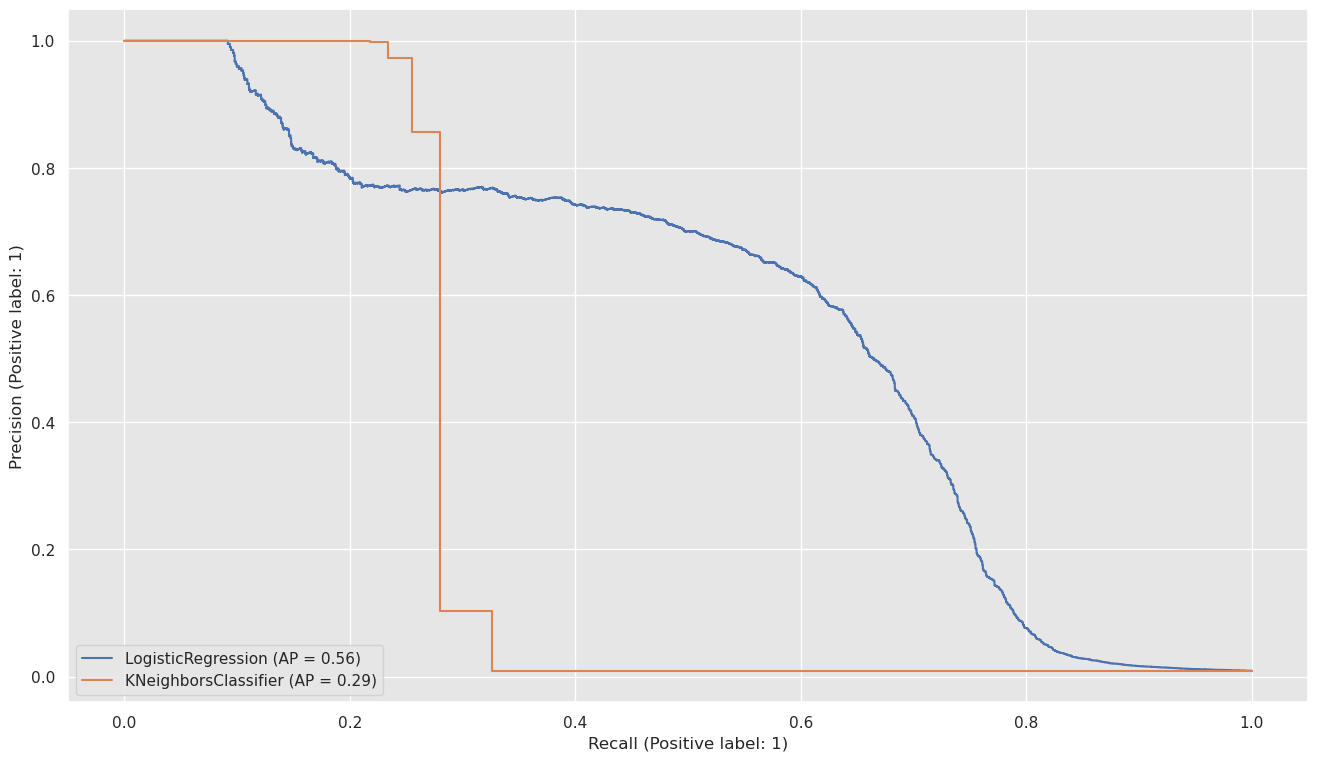

In [89]:
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(16, 9))

pr_disp = PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test, ax=plt.axes())
PrecisionRecallDisplay.from_estimator(knn, X_test, y_test, ax=pr_disp.ax_)

plt.show()

### ROC (Receiver Operating Characteristic) - Curve

**True Positive Rate** (Recall) - proportion of correct answers among all *true* objects of the positive class
$$
    TPR = \frac{TP}{TP + FN}
$$
**False Positive Rate** - proportion of correct answers among all *true* objects of the negative class
$$
    FPR = \frac{FP}{FP + TN}
$$

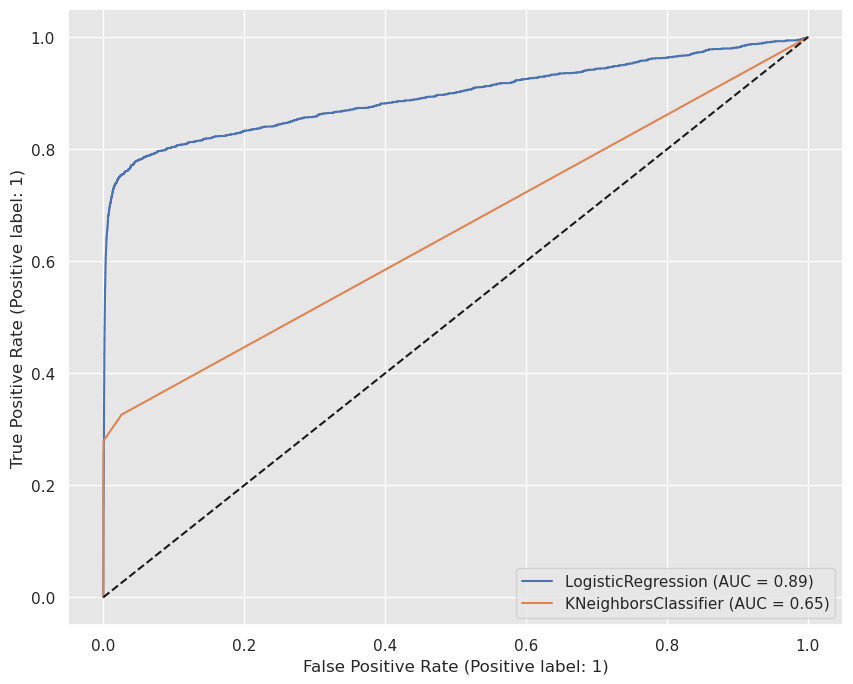

In [90]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 8))

roc_disp = RocCurveDisplay.from_estimator(logreg, X_test, y_test, ax=plt.axes())
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=roc_disp.ax_)

roc_disp.ax_.plot([0, 1], [0, 1], 'k--');

### ROC-AUC - ROC area under the curve

In [92]:
from sklearn.metrics import roc_auc_score

knn_y_pred_proba = knn.predict_proba(X_test)[:, 1]
logreg_y_pred_proba = logreg.predict_proba(X_test)[:, 1]

knn_roc_auc = roc_auc_score(y_test, knn_y_pred_proba)
logreg_roc_auc = roc_auc_score(y_test, logreg_y_pred_proba)

print(f"kNN ROC-AUC = {knn_roc_auc:.5}")
print(f"LogReg ROC-AUC = {logreg_roc_auc:.5}")

kNN ROC-AUC = 0.65369
LogReg ROC-AUC = 0.89499
